# List of Contents

1. Environment Setup
2. Address PII Data
3. Derive 'Region' Column
4. Region Spending Habits
5. Low Activity Exclusion Flag
6. Customer Profiles
    6.1 Customer Age Groups
    6.2 Income Groups
7. Customer Profile Visualizations
    7.1 Customer Age Groups
    7.2 Income Groups
    7.3 Customer Age Groups x Income Groups
8. Customer Profile Aggregations
    8.1 Customer Age Groups
    8.2 Income Groups
9. Comparing Customer Profiles with Region and Department
    9.1 Setup
    9.2 Age Group x Region
    9.3 Age Group x Department
    9.4 Income Group x Region
    9.5 Income Group X Department
10. Export file

## 1. Environment Setup

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import file
path = r'/Users/Cel/Documents/Data Analytics/09-2023 Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

## 2. Fix PII data

In [5]:
# Drop 'first_name' and 'surname' columns
ords_prods_clean = ords_prods_merge.drop(columns = ['first_name','surname'])

## 3. Derive 'region' column from 'state'

In [6]:
# Define regions
northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [7]:
# Create 'region' column from 'state' conditions
ords_prods_clean.loc[ords_prods_merge['state'].isin(northeast), 'region'] = 'Northeast'

In [8]:
ords_prods_clean.loc[ords_prods_merge['state'].isin(midwest), 'region'] = 'Midwest'

In [9]:
ords_prods_clean.loc[ords_prods_merge['state'].isin(south), 'region'] = 'South'

In [10]:
ords_prods_clean.loc[ords_prods_merge['state'].isin(west), 'region'] = 'West'

In [11]:
ords_prods_clean['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 4. Spending habits in regions

In [12]:
# Create a crosstab between the “region” column and the “spending_category” column 
crosstab = pd.crosstab(ords_prods_clean['region'], ords_prods_merge['spending_category'], dropna = False)

In [13]:
crosstab

spending_category,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Most regions have about 98% low spenders. The midwest has the highest proportion of high spenders (2.05%).

In [177]:
crosstab.to_csv(os.path.join(path, '02 Data','Prepared Data', 'region_spending.csv'))

## 5. Exclusion flag for low activity customers

In [14]:
# Create 'spending_activity' column based on 'max_order'
ords_prods_clean.loc[ords_prods_clean['max_order'] < 5, 'spending_activity'] = 'Low activity'

In [15]:
ords_prods_clean.loc[ords_prods_clean['max_order'] >= 5, 'spending_activity'] = 'High activity'

In [16]:
# Drop 'Low activity' customers by creating new subsetted data frame
high_activity_customers = ords_prods_clean[ords_prods_clean['spending_activity'] == 'High activity']

In [17]:
# Export to pickle
high_activity_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_high_activity.pkl'))

In [18]:
# Check number of rows after exclusion
high_activity_customers.shape

(30964564, 31)

## 6. Customer profiles

#### 6.1 Customer age groups

In [102]:
# Create age group columns based on 'age' conditions
high_activity_customers.loc[high_activity_customers['age']<= 30, 'age_group'] = '18-30'
high_activity_customers.loc[(high_activity_customers['age']> 30) & (high_activity_customers['age']<= 45), 'age_group'] = '30-45'
high_activity_customers.loc[(high_activity_customers['age']> 45) & (high_activity_customers['age']<= 60), 'age_group'] = '45-60'
high_activity_customers.loc[(high_activity_customers['age']> 60) & (high_activity_customers['age']<= 75), 'age_group'] = '60-75'
high_activity_customers.loc[high_activity_customers['age']> 75, 'age_group'] = '75+'

In [103]:
high_activity_customers['age_group'].value_counts(dropna = False)

age_group
45-60    7284900
30-45    7262817
60-75    7199207
18-30    6304240
75+      2913400
Name: count, dtype: int64

#### 6.2 Income groups

In [22]:
# Descriptive statistics on 'income' column
high_activity_customers['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [130]:
# Create income group columns based on 'income' conditions
high_activity_customers.loc[high_activity_customers['income']<= 30000, 'income_group'] = '$0-$30,000'
high_activity_customers.loc[(high_activity_customers['income']> 30000) & (high_activity_customers['age']<= 60000), 'income_group'] = '$30,000-$60,000'
high_activity_customers.loc[(high_activity_customers['income']> 60000) & (high_activity_customers['age']<= 90000), 'income_group'] = '$60,000-$90,000'
high_activity_customers.loc[(high_activity_customers['income']> 90000) & (high_activity_customers['age']<= 120000), 'income_group'] = '$90,000-$120,000'
high_activity_customers.loc[(high_activity_customers['income']> 120000) & (high_activity_customers['age']<= 150000), 'income_group'] = '$120,000-$150,000'
high_activity_customers.loc[high_activity_customers['income']> 150000, 'income_group'] = '$150,000+'

In [129]:
high_activity_customers['income_group'].value_counts().sort_index()

income_group
0-30,000            194132
120,000-150,000    5284979
150,000+           3894534
30,000-60,000      5609169
60,000-90,000      7331431
90,000-120,000     8650319
Name: count, dtype: int64

## 7. Visualizations for customer profiles

#### 7.1 Customer age groups

Text(0.5, 1.0, 'Age Distribution for Instacart Users')

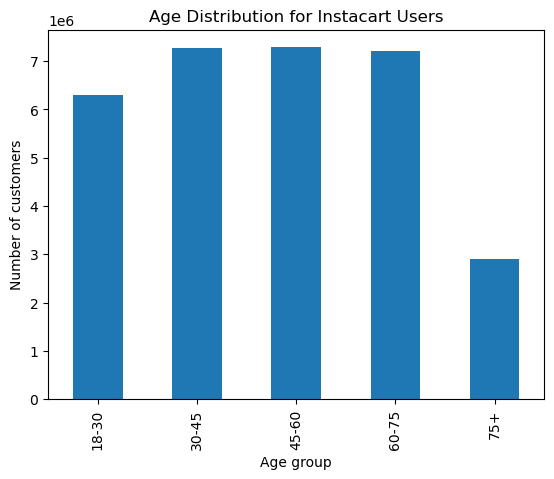

In [110]:
# Create bar chart for age_group column
bar_age_group = high_activity_customers['age_group'].value_counts().sort_index().plot.bar()
plt.xlabel('Age group')
plt.ylabel('Number of customers')  
plt.title('Age Distribution for Instacart Users')

In [111]:
# Export image file
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group'))

#### 7.2 Income groups

Text(0.5, 1.0, 'Income Distribution for Instacart Users')

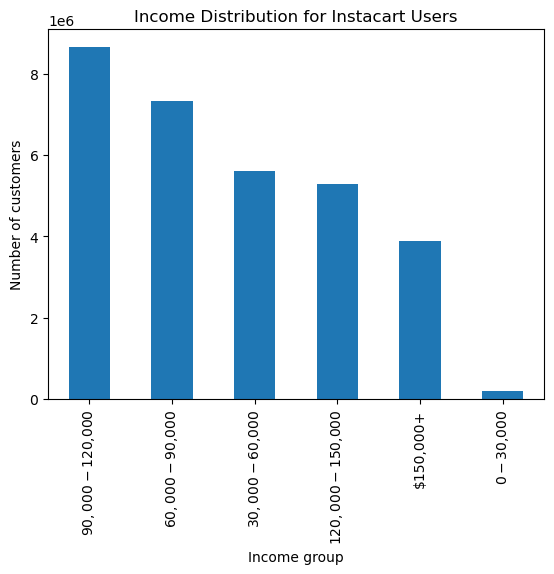

In [123]:
# Create bar chart for income_group column
bar_income_group = high_activity_customers['income_group'].value_counts().plot.bar()
plt.xlabel('Income group')
plt.ylabel('Number of customers')  
plt.title('Income Distribution for Instacart Users')

In [131]:
# Export image file
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group'))

#### 7.3 Income x Age groups

In [135]:
# Create a crosstab between the 'age_group' column and the 'income_group' column 
age_income = pd.crosstab(high_activity_customers['age_group'], high_activity_customers['income_group'], dropna = False)

In [136]:
age_income

income_group,"$0-$30,000","$120,000-$150,000","$150,000+","$30,000-$60,000","$60,000-$90,000","$90,000-$120,000"
age_group,,,,,,
18-30,97572,15304,58643,1930223,3158068,1044430
30-45,81003,661916,526087,1737047,2674051,1582713
45-60,5006,1921079,1392271,837984,614910,2513650
60-75,9010,1891438,1383813,774031,628819,2512096
75+,1541,795242,533720,329884,255583,997430


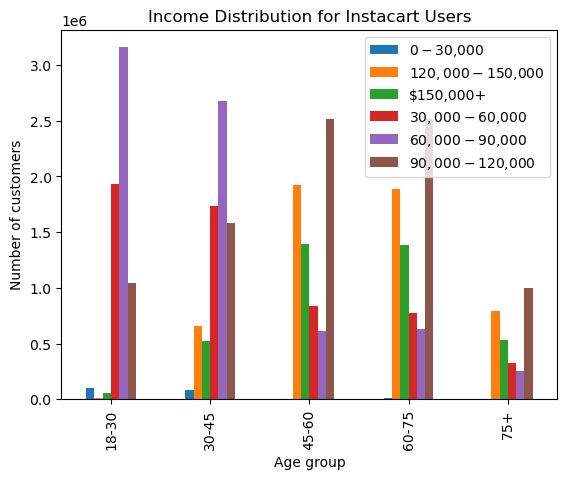

In [168]:
# Create bar chart for age_income crosstab
bar_age_income = age_income.plot.bar()
plt.xlabel('Age group')
plt.ylabel('Number of customers')  
plt.title('Income Distribution for Instacart Users')
plt.legend(loc='upper right')

In [139]:
# Export image file
bar_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_income'))

## 8. Customer profile aggregations for usage frequency and expenditure

#### 8.1 Customer age groups

In [140]:
# Aggregate min, max, and mean for 'days_since_prior_order' and 'average_spend'
high_activity_customers.groupby('age_group',)[['days_since_prior_order','average_spend']].agg(['min','max','mean'])

days_since_prior_order                  average_spend                \
                             min   max       mean           min           max   
age_group                                                                       
18-30                        0.0  30.0  10.838774      1.628571  10209.987755   
30-45                        0.0  30.0  10.788131      1.000000   6983.593023   
45-60                        0.0  30.0  10.833339      1.000000  15006.940000   
60-75                        0.0  30.0  10.777376      1.262500   7414.485185   
75+                          0.0  30.0  10.827715      1.933333  14042.512281   

                      
                mean  
age_group             
18-30      12.082739  
30-45      12.196545  
45-60      11.718976  
60-75      11.704245  
75+        12.057960

#### 8.2 Income groups

In [141]:
# Aggregate min, max, and mean for 'days_since_prior_order' and 'average_spend'
high_activity_customers.groupby('income_group',)[['days_since_prior_order','average_spend']].agg(['min','max','mean'])

days_since_prior_order                  average_spend  \
                                     min   max       mean           min   
income_group                                                              
$0-$30,000                           0.0  30.0  11.595375      1.773333   
$120,000-$150,000                    0.0  30.0  10.815766      7.000000   
$150,000+                            0.0  30.0  10.684293      7.000000   
$30,000-$60,000                      0.0  30.0  11.030784      1.000000   
$60,000-$90,000                      0.0  30.0  10.721604      7.000000   
$90,000-$120,000                     0.0  30.0  10.778915      7.000000   

                                            
                            max       mean  
income_group                                
$0-$30,000             7.000000   6.532439  
$120,000-$150,000  14042.512281  10.782264  
$150,000+          15006.940000  32.620080  
$30,000-$60,000       21.272202   7.110624  
$60,000-$90,000     3453.431034   8.092191  
$90,000-$120,000    5135.893590   9.827619

## 9. Compare customer profiles with regions and departments

#### 9.1 Setup

In [49]:
# Import departments df
dept = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [50]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [144]:
# Merge dept and high_activity_customers on 'department_id'
df_merged = high_activity_customers.merge(dept, on = 'department_id')

#### 9.2 Customer age groups x Region

In [145]:
# Create crosstab with 'age_group' and 'region'
age_region = pd.crosstab(df_merged['age_group'], df_merged['region'], dropna = False)

Text(0.5, 1.0, 'Age Groups Across Regions')

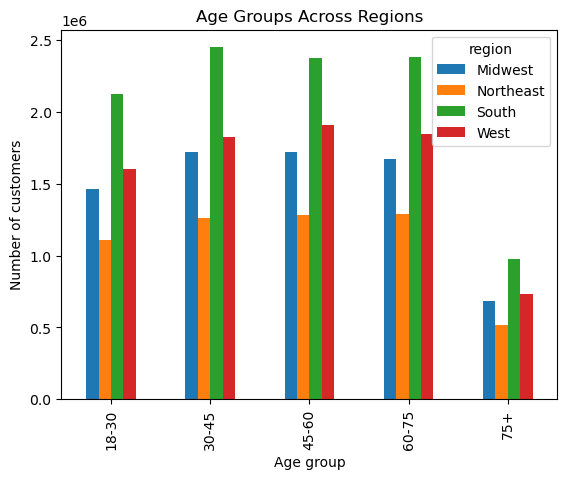

In [146]:
# Create bar chart for age_region crosstab
bar_age_region = age_region.plot.bar()
plt.xlabel('Age group')
plt.ylabel('Number of customers')  
plt.title('Age Groups Across Regions')

In [147]:
# Export image file
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_region'))

#### 9.3 Customer age groups x Department

In [162]:
# Create crosstab with 'age_group' and 'department'
age_department = pd.crosstab(df_merged['department'], df_merged['age_group'], dropna = False, normalize = 'index')

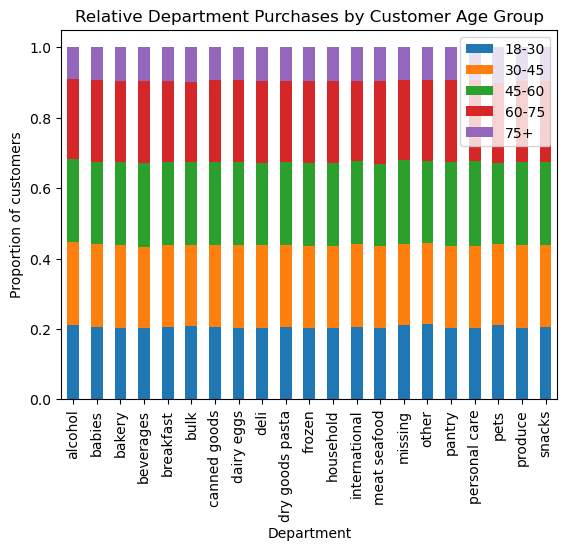

In [163]:
# Create bar chart for age_department crosstab
bar_age_dept = age_department.plot.bar(stacked = True)
plt.xlabel('Department')
plt.ylabel('Proportion of customers')  
plt.title('Relative Department Purchases by Customer Age Group')
plt.legend(loc='upper right')

In [164]:
# Export image file
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_dept'))

#### 9.4 Income group x Region

In [153]:
# Create crosstab with 'income_group' and 'region'
income_region = pd.crosstab(df_merged['income_group'], df_merged['region'], dropna = False)

Text(0.5, 1.0, 'Customer Income Groups by Region')

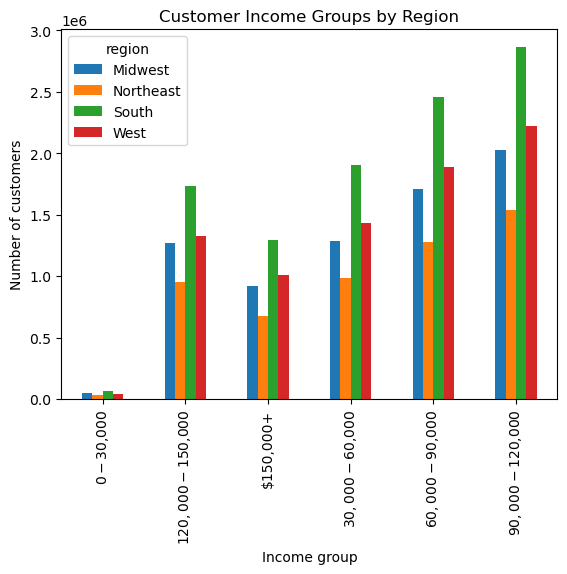

In [166]:
# Create bar chart for income_region crosstab
bar_income_region = income_region.plot.bar()
plt.xlabel('Income group')
plt.ylabel('Number of customers')  
plt.title('Customer Income Groups by Region')

In [157]:
# Export image file
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_region'))

#### 9.5 Income group x Department

In [158]:
# Create crosstab with 'income_group' and 'department' - normalize for proportions between income groups
income_department = pd.crosstab(df_merged['department'], df_merged['income_group'], dropna = False, normalize = 'index')

Text(0.5, 1.0, 'Relative Department Purchases by Income Group')

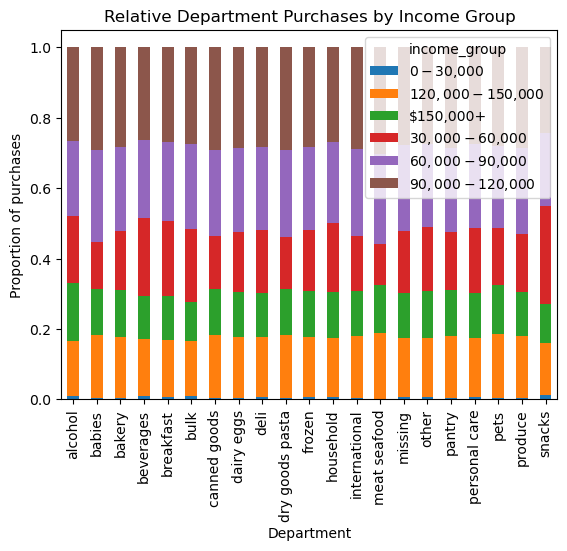

In [159]:
# Create 100% stacked bar chart for income_department crosstab
bar_income_dept = income_department.plot.bar(stacked = True)
plt.xlabel('Department')
plt.ylabel('Proportion of purchases')  
plt.title('Relative Department Purchases by Income Group')

In [175]:
# Export image file
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_dept'))

## 10. Export file

In [176]:
#Export to pickle
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_final.pkl'))